# Linear Algebra with NumPy

In [17]:
import numpy as np

## Array operations

Numpy supports linear algebra operations on arrays.
* interpret arrays as vectors (1D) and matrices (2D)
* fast due to numerical libraries

### Multiplying vectors and matrices
* `np.multiply` is element-wise multiplication and/or with scalars (as we know)
* `np.dot` and `np.vdot` are the most general
    * "sum product" over last axis of first and second-to-last axis of second argument
    * with scalars, equivalent to `np.multiply`
    * with vectors and matrices, equivalent to `np.matmul`
    * can also multiply higher-rank tensors
    * `np.vdot` conjugates the first argument (for complex values)
* `np.matmul` is specifically for matrices
    * broadcasts vectors into matrices
    * treats higher-rank arrays as stacks of matrices
    * overloads the Python matmul operator (`@`)
* `np.dot` and `np.matmul` are very different in higher dimensions

In [18]:
vec = np.array([2, 3])
A = np.diag((1, -1))
B = np.array([[0, 1], [1, 0]])

print(vec, '\n\n', A, '\n\n', B)

[2 3] 

 [[ 1  0]
 [ 0 -1]] 

 [[0 1]
 [1 0]]


In [19]:
np.dot(vec, 2)

array([4, 6])

In [20]:
np.dot(vec, vec)

13

In [21]:
np.dot(A, vec)

array([ 2, -3])

In [22]:
np.matmul(vec, vec)

13

In [23]:
np.matmul(A, vec)

array([ 2, -3])

In [24]:
np.matmul(A, B) # np.dot(A, B) yields the same, but this way is preferable

array([[ 0,  1],
       [-1,  0]])

In [25]:
A @ B

array([[ 0,  1],
       [-1,  0]])

In [26]:
M, v = np.array([[1, 2], [3, 4]]), np.array([1, 2])
M, v

(array([[1, 2],
        [3, 4]]),
 array([1, 2]))

In [27]:
np.matmul(M, v), np.matmul(v, M)

(array([ 5, 11]), array([ 7, 10]))

In [28]:
np.dot(vec, vec), np.vdot(vec, vec)

(13, 13)

In [29]:
np.dot(0+1j * vec, vec), np.vdot(0+1j * vec, vec)

(13j, -13j)

### Special products and sums
* `np.cross` is the cross product specifically defined for three dimensions
* `np.trace` is the sum of elements on the diagonal
* `np.einsum` does general sum-products with Einstein sum convention

In [47]:
a, b = np.split(np.arange(6), 2)
ones = np.ones((3, 3))

lc3 = np.zeros((3, 3, 3))
lc3[(0, 1, 2), (1, 2, 0), (2, 0, 1)] = 1
lc3[(0, 1, 2), (2, 0, 1), (1, 2, 0)] = -1

print(f'{a = }')
print(f'{b = }\n\n')
print(ones, '\n\n')
print(lc3)

a = array([0, 1, 2])
b = array([3, 4, 5])


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 


[[[ 0.  0.  0.]
  [ 0.  0.  1.]
  [ 0. -1.  0.]]

 [[ 0.  0. -1.]
  [ 0.  0.  0.]
  [ 1.  0.  0.]]

 [[ 0.  1.  0.]
  [-1.  0.  0.]
  [ 0.  0.  0.]]]


In [48]:
np.cross(a, b)

array([-3,  6, -3])

In [49]:
np.trace(ones)

3.0

In [50]:
np.einsum('i,j,ijk', a, b, lc3)

array([-3.,  6., -3.])

$$\Large \sum_{i, j} a_i b_j \epsilon_{ijk}$$

## Linear algebra package: `np.linalg`

Numpy has a bunch of linear algebra methods provided by highly optimized BLAS and LAPACK libraries packaged away in `np.linalg`. We will use some of them later on in the course, and here will look at some solvers:
* `np.linalg.solve` can solve linear systems of equations
    * matrix-vector equations $A\cdot \mathbf{x} = \mathbf{b}$ where $A \in \mathbb{R}^{n \times n}$, and $\mathbf{b}, \mathbf{x} \in \mathbb{R}^n$
    * linear matrix equations $A\cdot X = B$, where $A\in \mathbb{R}^{n \times n}$, $B, X \in \mathbb{R}^{n \times m}$

* `np.linalg.lstsq` solves optimization problems (e.g. for linear regression)
* `np.linalg.inv` inverts matrices (e.g. also for linear regression)

### Matrix-vector systems of equations

For an equation $A \mathbf{x} = \mathbf{b}$, find $\mathbf{x}$ given $A$ and $\mathbf{b}$.

$$
A=
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{bmatrix},\quad
\mathbf{x}=
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix},\quad
\mathbf{b}=
\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_n
\end{bmatrix}
$$

In [51]:
A = np.array([[1, 3, -2], [3, 5, 6], [2, 4, 3]])
b = np.array([5, 7, 8])
A, b

(array([[ 1,  3, -2],
        [ 3,  5,  6],
        [ 2,  4,  3]]),
 array([5, 7, 8]))

In [52]:
np.linalg.solve(A, b)

array([-15.,   8.,   2.])

### Least-Squares optimization
For fitting giant datasets with linear regression, we can use least-squares optimization. Given $n$ observations of $m$ features each coded in a matrix $A \in \mathbb{R}^{n \times m}$ and observations $\mathbf{b} \in \mathbb{R}^n$, we want to find weights $\mathbf{x} \in \mathbb{R}^m$ such that $A\cdot \mathbf{x} - \mathbf{b}$ becomes minimal.

We will deal with linear regression in detail later on.

In [56]:
A = np.array([[1, 3, -2], [3, 5, 6], [2, 4, 3], [4, 2, 2]])
b = np.array([5, 7, 8, 9])
A, b

(array([[ 1,  3, -2],
        [ 3,  5,  6],
        [ 2,  4,  3],
        [ 4,  2,  2]]),
 array([5, 7, 8, 9]))

In [57]:
np.linalg.lstsq(A, b, rcond=None)

(array([ 1.98040033,  0.90950792, -0.41117598]),
 array([4.00500417]),
 3,
 array([10.81948238,  3.76119511,  2.40670155]))

### Linear matrix equation
For an equation $A X = B$, find $X$ given $A$ and $B$.

$$
A=
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{bmatrix},\quad
B = 
\begin{bmatrix}
b_{11} & b_{12} & \cdots & x_{1m} \\
b_{21} & b_{22} & \cdots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
b_{n1} & b_{n2} & \cdots & x_{nm}
\end{bmatrix},\quad
X = 
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1m} \\
x_{21} & x_{22} & \cdots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nm}
\end{bmatrix}
$$

In [61]:
A = 5 * np.array([[1, 1, 0], [1, 0, 1], [0, 1, 1]]) / 2
B = np.eye(3, 2)
A, B

(array([[2.5, 2.5, 0. ],
        [2.5, 0. , 2.5],
        [0. , 2.5, 2.5]]),
 array([[1., 0.],
        [0., 1.],
        [0., 0.]]))

In [62]:
np.linalg.solve(A, B)

array([[ 0.2,  0.2],
       [ 0.2, -0.2],
       [-0.2,  0.2]])

### Matrix inversion

Matrix inversion is equivalent to solving the linear system of equations (with $A, X \in \mathbb{R}^{n \times n}$):

$$A X = \mathbb{1}_{n \times n}$$

With NumPy we can directly determine the inverse by calling `np.linalg.inv()`

In [65]:
A = np.array([[-1, 1, 1], [1, -1, 1], [1, 1, -1]])
A

array([[-1,  1,  1],
       [ 1, -1,  1],
       [ 1,  1, -1]])

In [66]:
np.linalg.solve(A, np.eye(3)) 

array([[-0. ,  0.5,  0.5],
       [ 0.5,  0. ,  0.5],
       [ 0.5,  0.5,  0. ]])

In [67]:
np.linalg.inv(A)

array([[-0. ,  0.5,  0.5],
       [ 0.5,  0. ,  0.5],
       [ 0.5,  0.5,  0. ]])

# Exercises: Linear Algebra

Key to exercises:
* `(R)`: Reproduction. You can solve these without referring back to the lecture notebooks.
* `(A)`: Application. Solving these may require looking up stuff in the lecture notebooks or online.
* `(T)`: Transfer. These may require some thinking, or referring to the internet.
* `(*)`: Especially difficult tasks. These might take some time even for experienced programmers.

`(R)` When can you use `np.multiply`, `np.dot`, and `np.matmul`? When is which recommended?

`np.multiply` ist für elementweise multiplikation  
`np.dot` ist für das Skalarprodukt und höhere Tensoren  
`np.matmul` ist für  Matrix-Matrix-Multiplikation  

`(A)` Invert the $5\times5$ Hilbert matrix, with `np.linalg.solve`, `np.linalg.lstsq`, and `np.linalg.inv`.

In [96]:
H = np.array([[1/(i+j+1) for i in range(5)] for j in range(5)])

H_inv = np.linalg.inv(H)
H_inv_1 = np.linalg.solve(H, np.eye(5))
H_inv_2 = np.linalg.lstsq(H, np.eye(5), rcond=None)[0]


np.testing.assert_equal(H_inv, H_inv_1)
np.testing.assert_equal(H_inv, H_inv_2)

AssertionError: 
Arrays are not equal

Mismatched elements: 25 / 25 (100%)
Max absolute difference: 5.61209163e-07
Max relative difference: 3.52158514e-12
 x: array([[ 2.500e+01, -3.000e+02,  1.050e+03, -1.400e+03,  6.300e+02],
       [-3.000e+02,  4.800e+03, -1.890e+04,  2.688e+04, -1.260e+04],
       [ 1.050e+03, -1.890e+04,  7.938e+04, -1.176e+05,  5.670e+04],...
 y: array([[ 2.500e+01, -3.000e+02,  1.050e+03, -1.400e+03,  6.300e+02],
       [-3.000e+02,  4.800e+03, -1.890e+04,  2.688e+04, -1.260e+04],
       [ 1.050e+03, -1.890e+04,  7.938e+04, -1.176e+05,  5.670e+04],...

(`T`) Generalize to $N\times N$ Hilbert matrices and plot the runtimes of the various ways of solving.

<Axes: xlabel='n'>

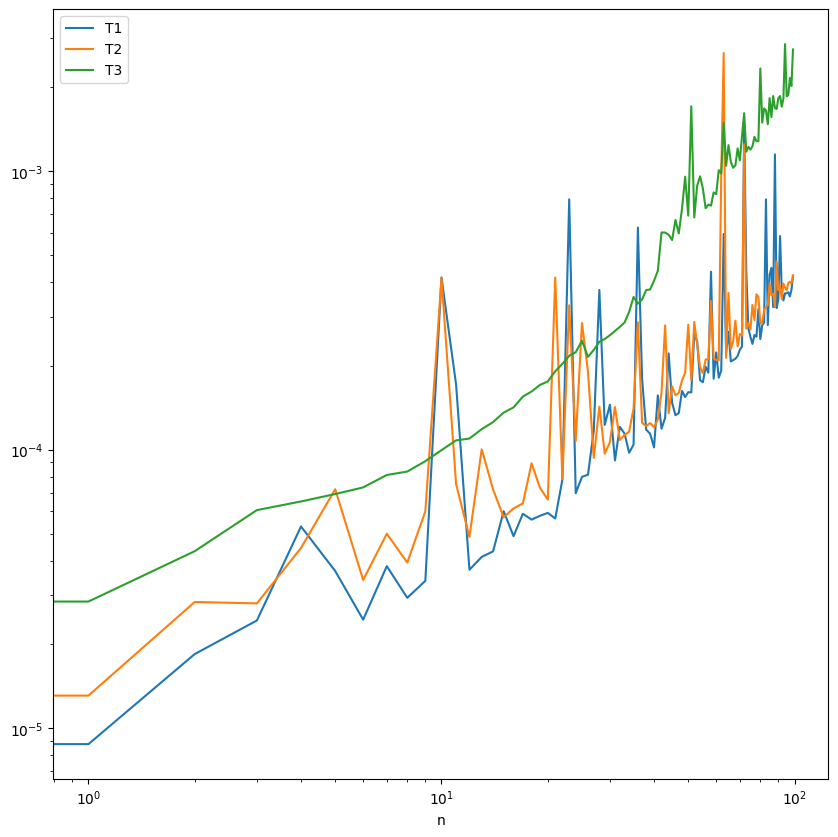

In [102]:
import timeit
import pandas as pd

def hilbert(n):
    return 1 / (np.arange(1, n+1) + np.arange(n).reshape(n, 1))

def invert_timed(H, n):
    T1 = np.array([timeit.timeit(lambda: np.linalg.inv(H), number=1) for i in range(100)]).mean()
    T2 = np.array([timeit.timeit(lambda: np.linalg.solve(H, np.eye(n)), number=1) for i in range(100)]).mean()
    T3 = np.array([timeit.timeit(lambda: np.linalg.lstsq(H, np.eye(n), rcond=None), number=1) for i in range(100)]).mean()
    return T1, T2, T3

df = pd.DataFrame(columns=['n', 'T1', 'T2', 'T3'])
df = df.astype({'n': int, 'T1': float, 'T2': float, 'T3': float})
df = df.set_index('n')
for n in range(0, 100):
    hilbert_n = hilbert(n)
    T1, T2, T3 = invert_timed(hilbert_n, n)
    df.loc[n] = [T1, T2, T3]

df = df.fillna(0)

df.plot(kind='line', loglog=True, figsize=(10, 10))
    

(`*`) For various sizes of the Hilber matrix, quantify the accuracy of the three methods against the exact analytical result. What do you find?

In [44]:
...

Ellipsis

3. `(T)` Calculate the product of two Levi-Civita symbols $\sum_k \varepsilon_{ijk} \varepsilon_{lkm}$.

Ellipsis